# 範例 : (Kaggle)房價預測
以下用房價預測資料, 觀察降低資料偏態的影響 <br />
## [教學目標]
以下用房價預測資料, 觀察降低偏態的影響<br />
## [範例重點]
觀察原始數值的散佈圖, 以及線性迴歸分數 <br />
觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 <br />
觀察使用box-cox(λ=0.15)時, 對於分布與迴歸分數的影響 <br />
觀察使用sqrt(box-cox, λ=0.5)時, 對於分布與迴歸分數的影響 <br />

In [11]:
#import modules we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

data_dir = './datas/'
train_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

train_label = np.log1p(train_df.SalePrice)
test_ids = test_df.Id
train_df = train_df.drop(['Id','SalePrice'], axis = 1)
test_df = test_df.drop(['Id'], axis = 1)

df = pd.concat([train_df,test_df])
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
#Take the numerical features of df
numerical_features = df.columns[df.dtypes != 'object']
print(f' {len(numerical_features)} Numerical Features : {numerical_features} \n' )

numerical_df = df[numerical_features]
numerical_df = numerical_df.fillna(-1)
MMScaler = MinMaxScaler()
train_num = len(train_df)
numerical_df.head(5)

 36 Numerical Features : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


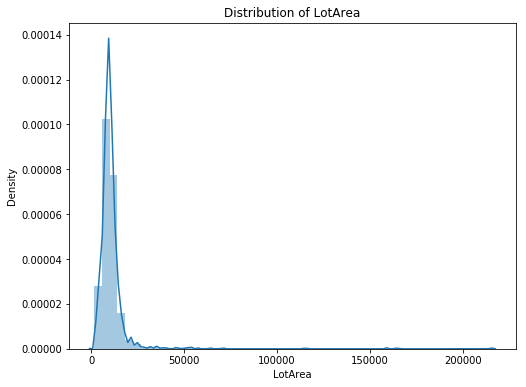

In [13]:
#Plot the distplot of LotArea column
plt.figure(figsize = (8,6))
sns.distplot(numerical_df['LotArea'][:train_num])
plt.xlabel('LotArea')
plt.ylabel('Density')
plt.title('Distribution of LotArea')
plt.show()

In [14]:
numerical_df_mm = MMScaler.fit_transform(numerical_df)
train_x = numerical_df_mm[:train_num]
LR = LinearRegression()
cross_val_score(LR,train_x,train_label,cv=5).mean()

0.8454595084023964

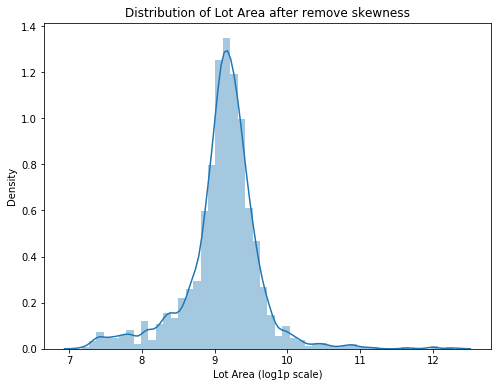

0.8518252325719811

In [19]:
#take the log1p on LotArea, then see the distpolt and score after that
#Deepcopy will copy the complete object not just take the reference of the object
import copy
temp_numerical_df = copy.deepcopy(numerical_df)
temp_numerical_df.LotArea = np.log1p(temp_numerical_df.LotArea)
plt.figure(figsize = (8,6))
sns.distplot(temp_numerical_df.LotArea[:train_num])
plt.xlabel('Lot Area (log1p scale)')
plt.ylabel('Density')
plt.title('Distribution of Lot Area after remove skewness')
plt.show()

temp_numerical_df_mm = MMScaler.fit_transform(temp_numerical_df)
train_x = temp_numerical_df_mm[:train_num]
LR = LinearRegression()
cross_val_score(LR,train_x,train_label,cv=5).mean()

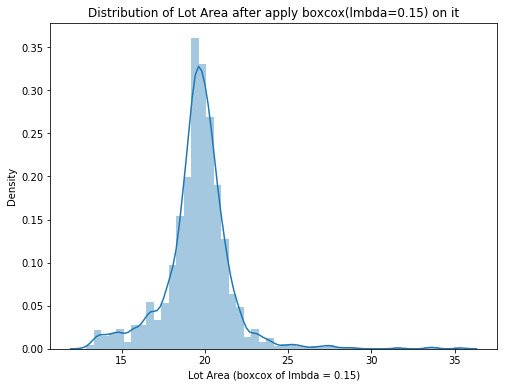

0.8532319270851951

In [21]:
#Observe the distplot and score after take the boxcox on LotArea
from scipy import stats
temp_numerical_df = copy.deepcopy(numerical_df)
temp_numerical_df.LotArea = stats.boxcox(temp_numerical_df.LotArea,lmbda = 0.15)
plt.figure(figsize = (8,6))
sns.distplot(temp_numerical_df.LotArea[:train_num])
plt.xlabel('Lot Area (boxcox of lmbda = 0.15)')
plt.ylabel('Density')
plt.title('Distribution of Lot Area after apply boxcox(lmbda=0.15) on it')
plt.show()

temp_numerical_df_mm = MMScaler.fit_transform(temp_numerical_df)
train_x = temp_numerical_df_mm[:train_num]
LR = LinearRegression()
cross_val_score(LR,train_x,train_label,cv=5).mean()


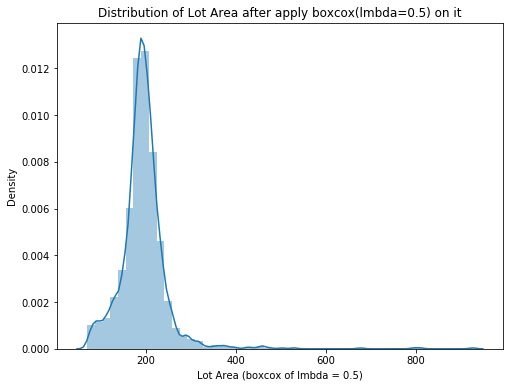

0.8495473512427367

In [23]:
#Observe the distplot and score after take the boxcox on LotArea
temp_numerical_df = copy.deepcopy(numerical_df)
temp_numerical_df.LotArea = stats.boxcox(temp_numerical_df.LotArea,lmbda = 0.5)
plt.figure(figsize = (8,6))
sns.distplot(temp_numerical_df.LotArea[:train_num])
plt.xlabel('Lot Area (boxcox of lmbda = 0.5)')
plt.ylabel('Density')
plt.title('Distribution of Lot Area after apply boxcox(lmbda=0.5) on it')
plt.show()

temp_numerical_df_mm = MMScaler.fit_transform(temp_numerical_df)
train_x = temp_numerical_df_mm[:train_num]
LR = LinearRegression()
cross_val_score(LR,train_x,train_label,cv=5).mean()

# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic <br />
<br />
## [作業目標]
試著模仿範例寫法, 在鐵達尼生存預測中, 觀察降低偏態的影響<br />
## [作業重點] 
觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 <br />
修正區塊中的資料問題後, 觀察以box-cox降偏態, 對於分布與迴歸分數的影響 <br />

In [24]:
from sklearn.linear_model import LogisticRegression
df_train = pd.read_csv(data_dir + 'titanic_train.csv')
df_test = pd.read_csv(data_dir + 'titanic_test.csv')

train_y = df_train.Survived
ids = df_test.PassengerId

df_train = df_train.drop(['PassengerId','Survived'], axis = 1)
df_test = df_test.drop(['PassengerId'], axis = 1)

titanic_df = pd.concat([df_train,df_test])
titanic_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Only take out the numerical features data in titanic df
titanic_train_num = len(df_train)
titanic_numerical_features = titanic_df.columns[titanic_df.dtypes != 'object']

print(f' {len(titanic_numerical_features)} Numerical Features : {titanic_numerical_features} \n')

titanic_numerical_df = titanic_df[titanic_numerical_features]
titanic_numerical_df = titanic_numerical_df.fillna(0)
titanic_numerical_df.head(5)

 5 Numerical Features : Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object') 



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


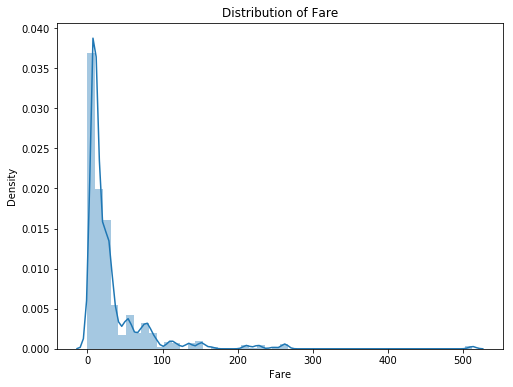

In [26]:
#Plot the distplot of Fare
plt.figure(figsize = (8,6))
sns.distplot(titanic_numerical_df.Fare[:titanic_train_num])
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Distribution of Fare')

plt.show()

In [28]:
#Record the score before we do any processing on Fare
titanic_numerical_df_mm = MMScaler.fit_transform(titanic_numerical_df)
train_x = titanic_numerical_df_mm[:titanic_train_num]
LR = LogisticRegression()
cross_val_score(LR,train_x,train_y,cv=5).mean()

0.7016289882888318

## 作業1
試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

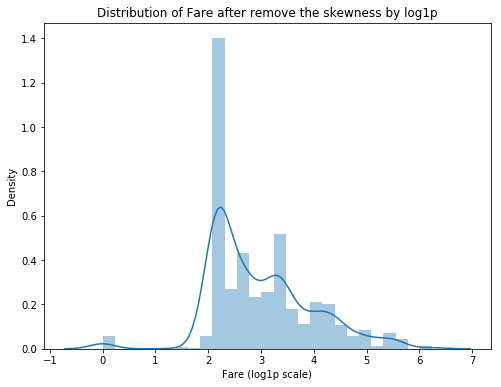

0.7106367963253961

In [29]:
#Take the log1p on Fare to remove the skewness and observe the score
temp_titanic_numerical_df = copy.deepcopy(titanic_numerical_df)
temp_titanic_numerical_df.Fare = np.log1p(temp_titanic_numerical_df.Fare)

plt.figure(figsize = (8,6))
sns.distplot(temp_titanic_numerical_df.Fare)
plt.xlabel('Fare (log1p scale)')
plt.ylabel('Density')
plt.title('Distribution of Fare after remove the skewness by log1p')
plt.show()

temp_titanic_numerical_df_mm = MMScaler.fit_transform(temp_titanic_numerical_df)
train_x = temp_titanic_numerical_df_mm[:titanic_train_num]
LR = LogisticRegression()
cross_val_score(LR,train_x,train_y,cv=5).mean()

## 作業2
最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

In [40]:
#If we do the boxcox on Fare directly will encounter error, lets see whats going on
temp_titanic_numerical_df = copy.deepcopy(titanic_numerical_df)
temp_titanic_numerical_df.Fare = stats.boxcox(temp_titanic_numerical_df.Fare,lmbda = 0.15)

ValueError: Data must be positive.

**The error shows that the data must be positive if we want to perform boxcox on it** <br />
**But why? because if we set the lmbda to 0 on boxcox, it equals to perform the log on data. The log shouldnt perform on the number small than 1** <br />
(I guess this is the reason) 

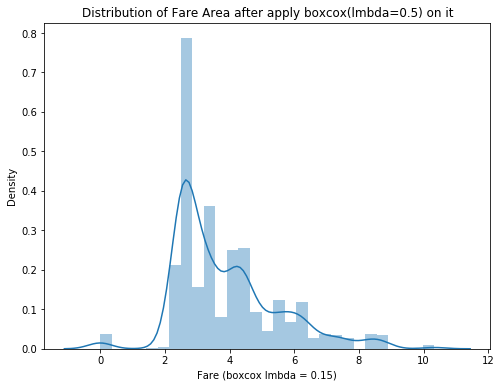

0.7095005757527076

In [42]:
#So the simplest way is add 1 to Fare data
temp_titanic_numerical_df = copy.deepcopy(titanic_numerical_df)
temp_titanic_numerical_df.Fare = stats.boxcox(temp_titanic_numerical_df.Fare + 1 ,lmbda = 0.15)

plt.figure(figsize = (8,6))
sns.distplot(temp_titanic_numerical_df.Fare)
plt.xlabel('Fare (boxcox lmbda = 0.15)')
plt.ylabel('Density')
plt.title('Distribution of Fare Area after apply boxcox(lmbda=0.5) on it')
plt.show()

temp_titanic_numerical_df_mm = MMScaler.fit_transform(temp_titanic_numerical_df)
train_x = temp_titanic_numerical_df_mm[:titanic_train_num]
LR = LogisticRegression()
cross_val_score(LR,train_x,train_y,cv=5).mean()